In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("compas-scores-two-years-violent.csv")

df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
2,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
3,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0


In [ ]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid', 'two_year_recid.1'],
      dtype='object')

In [ ]:
df.isnull().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     268
c_jail_in                   268
c_jail_out                  268
c_case_number                11
c_offense_date              771
c_arrest_date              3983
c_days_from_compas           11
c_charge_degree               0
c_charge_desc                17
is_recid                      0
r_case_number              3748
r_charge_degree            3748
r_days_from_arrest         4053
r_offense_date             3748
r_charge_desc              3771
r_jail_in                  4053
r_jail_o

In [ ]:
# # 1. 결측치가 하나라도 있는 행 제거
# df_cleaned = df.dropna()

# # 2. 체포일로부터 ±30일 넘는 기소일 제거
# df_cleaned = df_cleaned[(df_cleaned['c_days_from_compas'] >= -30) & (df_cleaned['c_days_from_compas'] <= 30)]

# # 3. 재범 여부가 -1인 경우 제거
# df_cleaned = df_cleaned[df_cleaned['is_recid'] != -1]

# # 4. 교통 위반('O') 제거
# df_cleaned = df_cleaned[df_cleaned['c_charge_degree'] != 'O']

# # 결과 확인
# print("전처리 후 데이터 개수:", df_cleaned.shape[0])


# 이거 했더니 ㄹㅇ 데이터 싹다날라가버림;;;;;;ㄹㅈㄷ

전처리 후 데이터 개수: 0


In [ ]:
# 결측치 비율 확인
missing_ratio = df.isnull().sum() / len(df)
print(missing_ratio.sort_values(ascending=False))


violent_recid              1.000000
r_days_from_arrest         0.854522
r_jail_out                 0.854522
r_jail_in                  0.854522
c_arrest_date              0.839764
vr_charge_degree           0.827324
vr_offense_date            0.827324
vr_charge_desc             0.827324
vr_case_number             0.827324
r_charge_desc              0.795066
r_charge_degree            0.790217
r_case_number              0.790217
r_offense_date             0.790217
c_offense_date             0.162555
c_jail_in                  0.056504
c_jail_out                 0.056504
days_b_screening_arrest    0.056504
in_custody                 0.044065
out_custody                0.044065
c_charge_desc              0.003584
c_days_from_compas         0.002319
c_case_number              0.002319
score_text                 0.001054
end                        0.000000
start                      0.000000
event                      0.000000
two_year_recid             0.000000
v_screening_date           0

In [ ]:
# 1. 결측치 너무 많은 컬럼 제거
to_drop = missing_ratio[missing_ratio > 0.5].index
df_reduced = df.drop(columns=to_drop)

# 2. 결측치 적은 컬럼만 dropna 적용
df_cleaned = df_reduced.dropna()


In [ ]:
df_cleaned

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0
6,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0,0
7,13,bo bradac,bo,bradac,2013-11-04,Male,1994-06-10,21,Less than 25,Caucasian,...,Medium,2013-11-04,2015-01-06,2015-01-07,1,0,428,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,10995,raheem smith,raheem,smith,2013-10-20,Male,1995-06-28,20,Less than 25,African-American,...,High,2013-10-20,2014-04-07,2014-04-27,0,0,169,0,0,0
4739,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0,0
4740,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0,0
4741,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0,0


In [ ]:
df_cleaned = df_cleaned[
    (df_cleaned['c_days_from_compas'] >= -30) &
    (df_cleaned['c_days_from_compas'] <= 30)
]

# Northpointe의 공식 문서에서도 점수 계산 시점과 범죄 간 연관성이 낮은 경우 데이터의 신뢰성이 떨어진다고 지적해.
#그래서 -30 <= c_days_from_compas <= 30 조건을 걸어서 관련 있는 데이터만 남겨!

In [ ]:
df_cleaned = df_cleaned[df_cleaned['is_recid'] != -1]
#  의미:
# is_recid: 재범 여부 (0: 재범 아님 / 1: 재범함 / -1: 알 수 없음)

#-1은 COMPAS 시스템이 해당 사람의 재범 여부 데이터를 찾지 못한 경우야.
#이건 분석에 쓸 수 없는 값이니까 제거하는 거야.

In [ ]:
df_cleaned = df_cleaned[df_cleaned['c_charge_degree'] != 'O']
# c_charge_degree: 기소된 범죄의 심각도
#'F': 중범죄 (felony), 'M': 경범죄 (misdemeanor),'O': 기타, 주로 교통위반 같은 사소한 범죄
# 'O'는 보통 일반적인 교통위반 등 너무 가벼운 범죄를 의미해. 이런 경우엔 재범 판단 기준이 다를 수 있고, 데이터 왜곡이 생길 수 있어.
# 그래서 'O'인 행은 제거하는 거야.

In [ ]:
df_cleaned

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0
6,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0,0
8,14,benjamin franc,benjamin,franc,2013-11-26,Male,1988-06-01,27,25 - 45,Caucasian,...,Low,2013-11-26,2013-11-25,2013-11-26,0,0,857,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,10995,raheem smith,raheem,smith,2013-10-20,Male,1995-06-28,20,Less than 25,African-American,...,High,2013-10-20,2014-04-07,2014-04-27,0,0,169,0,0,0
4739,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0,0
4740,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0,0
4741,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0,0


왜 Northpointe가 Cox 모형을 썼을까?
COMPAS는 단순히 “재범할까?”만 보는 게 아니라, "얼마나 빨리 재범할까?", 즉 재범까지 걸리는 시간을 예측하려는 면이 있거든.
그래서 Cox 모형처럼 시간의 흐름을 반영한 생존 분석 기법이 잘 맞는 거야.


Cox 모형이 좋은 이유
시간 요소 고려	단순 이진 분류(재범/비재범)보다, ‘언제’ 재범하는지까지 예측 가능
 해석력 좋음	각 변수의 **위험비(hazard ratio)**를 통해 영향력 해석이 쉬움
법적/윤리적 설명력	예측이 “왜 그렇게 나왔는가”를 설명하기 용이 — Fairness 관점에서 플러스


 주의할 점
Cox 모형은 **비례위험 가정(Proportional Hazards assumption)**이 있어. → 각 변수의 효과가 시간에 따라 일정해야 함
이 가정을 만족하지 않으면 성능이 떨어질 수 있어

써볼만한 경우
**재범 시점 정보(start, end, event)**가 잘 정리되어 있다면 적극 추천
단순한 binary classification (재범 여부만) 보다는 “재범까지 걸린 시간”이 있는 경우 더 적합

In [ ]:
df_cleaned.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'is_violent_recid', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid', 'two_year_recid.1',
       'duration'],
      dtype='object')

In [ ]:
df_cleaned['duration'] = df_cleaned['end'] - df_cleaned['start']

# duration_col: 사건 발생까지 걸린 시간 → end - start

# event_col: 사건이 실제로 발생했는지 여부 (0 or 1) → event

In [ ]:
x_cols = [
    'juv_fel_count', 'juv_misd_count',
    'juv_other_count', 'priors_count', 'decile_score', 'score_text',
    'c_charge_degree'
]
x = df_cleaned[x_cols]
x_encoded = pd.get_dummies(x, drop_first=True)  # 원-핫 인코딩


In [ ]:
from lifelines import CoxPHFitter

# duration과 event가 있어야 해!
df_for_cox = pd.concat([df_cleaned[['duration', 'event']], x_encoded], axis=1)

# 모델 적합
cph = CoxPHFitter()
cph.fit(df_for_cox, duration_col='duration', event_col='event')

# 결과 출력
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 3456 total observations, 2885 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 3456
number of events observed = 571
   partial log-likelihood = -4309.01
         time fit was run = 2025-04-10 15:30:49 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
juv_fel_count      0.06      1.06      0.08           -0.10            0.21                0.91                1.24
juv_misd_count    -0.07      0.94      0.08           -0.23            0.10                0.80                1.10
juv_other_count    0.20      1.22      0.06            0.08            0.32                1.08                1.38
priors_count       0.05      1.05      0.01            0.03            0.06                1.03                1.07
decile_score       0.24      1.27      0.04            0.15            0.32                1.16                1.38
score_text_Low    -0.02      0.98      0.30           -0.61            0.57                0.54                1.77
score_text_Medium -0.18      0.83      0.17           -0.51            0.15                0.60                1.16
c_charge_degree_M  0.18      1.19      0.09            0.01            0.35                1.01                1.42

                   cmp to     z      p  -log2(p)
covariate                                       
juv_fel_count        0.00  0.73   0.46      1.11
juv_misd_count       0.00 -0.79   0.43      1.22
juv_other_count      0.00  3.25 <0.005      9.77
priors_count         0.00  5.75 <0.005     26.72
decile_score         0.00  5.41 <0.005     23.88
score_text_Low       0.00 -0.07   0.94      0.09
score_text_Medium    0.00 -1.09   0.28      1.86
c_charge_degree_M    0.00  2.03   0.04      4.57
---
Concordance = 0.73
Partial AIC = 8634.02
log-likelihood ratio test = 373.92 on 8 df
-log2(p) of ll-ratio test = 249.65

 exp(coef) (Hazard Ratio)

'>1': 위험 증가

'<1': 위험 감소

'=1': 영향 없음


일반적으로 p < 0.05면 통계적으로 유의미하다고 판단해.


 juv_other_count	1.22	소년 기타 범죄 수가 많을수록 재범 위험 증가, p < 0.005 →  유의미
 priors_count	1.05	전과가 많을수록 재범 위험 증가, p < 0.005 → 강하게 유의미 (z값도 높고, p값도 매우 작음)
 decile_score	1.27	COMPAS 점수가 높을수록 재범 위험 증가, p < 0.005 → 강하게 유의미(마찬가지)
 c_charge_degree_M	1.19	중범죄(M)는 경범죄보다 재범 위험이 약간 높음, p = 0.04 → 유의미

lifelines에서 CoxPHFitter 객체로 forest plot을 쉽게 그릴 수 있어!
이 그래프는 각 변수의 exp(coef) (즉, hazard ratio)와 95% 신뢰 구간을 시각화해서 해석을 도와주는 도구야.

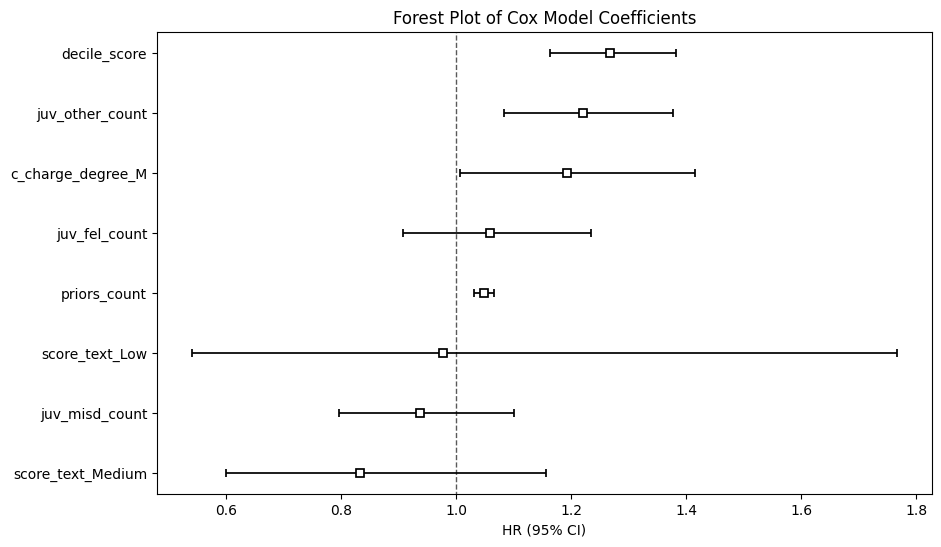

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# cph 모델의 forest plot 그리기 (hazard ratio 기준)
cph.plot(hazard_ratios=True)

# 제목 추가 (선택)
plt.title("Forest Plot of Cox Model Coefficients")

# 그래프 보여주기
plt.show()


중앙선이 1을 지나가면 그 변수는 영향이 없을 수도 있다는 의마

exp(coef) > 1: 위험도(재범 위험)가 증가하는 변수

exp(coef) < 1: 위험도(재범 위험)가 감소하는 변수

1을 포함하는 신뢰구간: 통계적으로 유의하지 않을 가능성 있음

juv_other_count, priors_count, decile_score, c_charge_degree_M -> 재범 발생률에 통계적으로 유의미한 영향을 준다는 결론도출


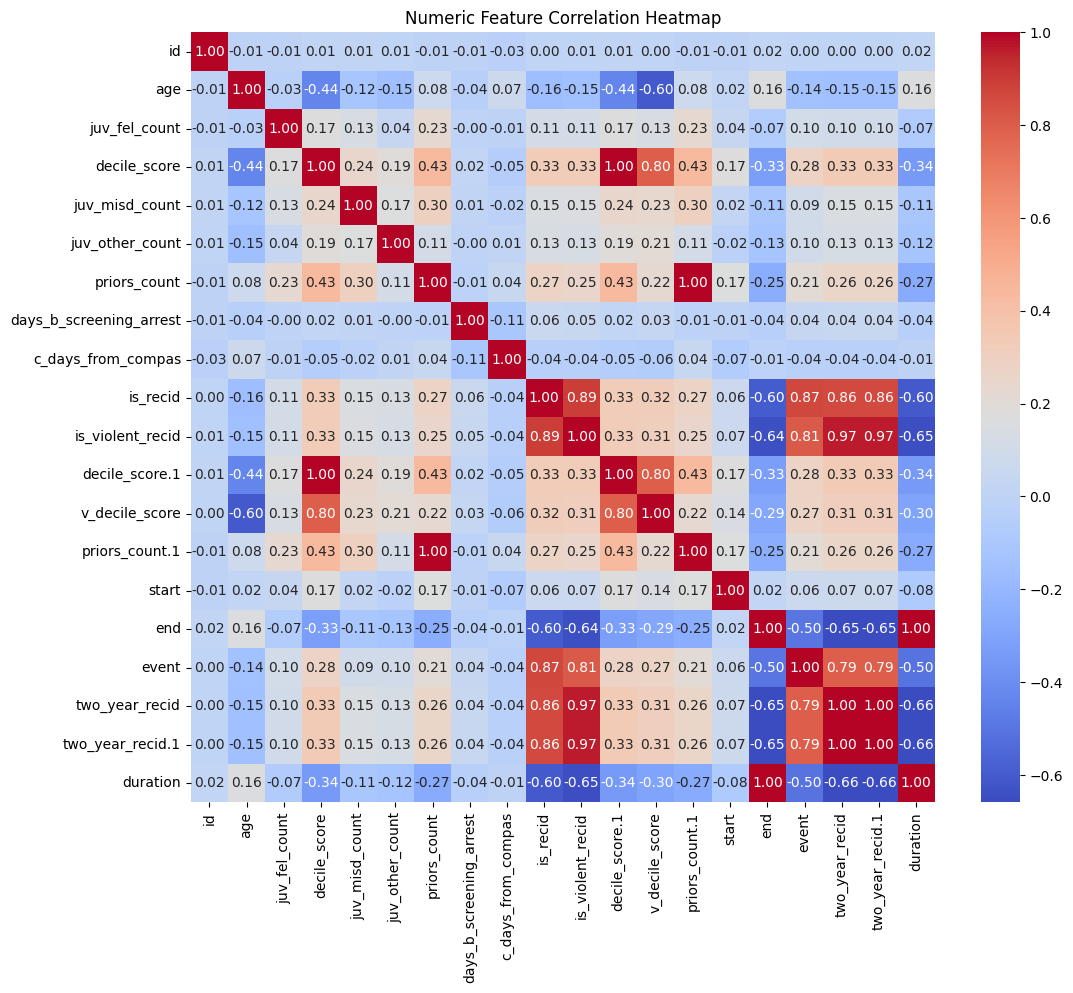

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수만 선택
numeric_cols = df_cleaned.select_dtypes(include=[np.number])

# 상관계수 행렬
corr_matrix = numeric_cols.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Numeric Feature Correlation Heatmap")
plt.show()


유의미한 상관관계 짚어보기 (절댓값 기준 > 0.7 이상이면 다중공선성 의심)
1. decile_score와 priors_count: 0.43
꽤 상관관계가 있긴 하지만, 다중공선성 수준은 아님.

둘 다 Cox 모델에서 유의미하게 나왔던 변수들이라, 각기 독립적인 설명력이 있는 것으로 해석 가능!

2. is_recid, is_violent_recid, two_year_recid, event:
이 네 변수끼리는 0.85~0.97까지 매우 높은 상관관계를 보임.

특히 event와 two_year_recid는 0.91로 아주 밀접함 → 동일/유사 지표일 가능성 (이는 Cox 분석에서 중복 사용하면 안 됨!)

3. juv_* 시리즈끼리는 살짝씩 상관관계가 있어 (0.2~0.3대)
다중공선성은 아니고, 자연스러운 경향.

예: juv_fel_count와 juv_misd_count가 0.24



        변수쌍 상관계수
is_recid vs two_year_recid	        0.87

is_violent_recid vs two_year_recid	0.86

event vs two_year_recid	            0.91


➡️ 이런 변수들은 동시에 모델에 넣으면 해석 꼬일 수 있어, 주로 하나만 대표로 선택해주는 게 좋아!

# 컬럼 정보

🔹 기본 정보
compas_screening_date: COMPAS 평가가 이루어진 날짜

dob: 피고인의 생년월일 (date of birth)

🔹 소년범 전과 정보
juv_misd_count: 청소년기 경범죄 전과 횟수

juv_other_count: 청소년기 기타 전과 횟수

priors_count: 성인 전과 총 횟수

priors_count.1: 중복된 컬럼 (같은 값을 가질 수도 있음. 확인 필요)

🔹 현재 사건 관련
days_b_screening_arrest: 체포일과 COMPAS 평가일 사이의 일 수

c_case_number: 현재 사건(case)의 번호

c_offense_date: 현재 사건 범죄 발생일

c_arrest_date: 현재 사건 체포일

c_days_from_compas: 현재 사건 범죄 발생일과 COMPAS 평가일 사이의 일 수

c_charge_degree: 현재 사건의 혐의 등급 (예: M - misdemeanor, F - felony)

c_charge_desc: 현재 사건의 혐의 설명

c_jail_in / c_jail_out: 현재 사건으로 구속된 시작일과 종료일

🔹 재범 여부 및 재범 사건 정보
is_recid: 재범 여부 (1 = 재범, 0 = 비재범)

two_year_recid: 2년 내 재범 여부 (모델 성능 평가용)

two_year_recid.1: 중복된 컬럼

r_case_number: 재범 사건의 사건 번호

r_days_from_arrest: 재범 사건이 이전 사건 체포일로부터 며칠 후 발생했는지

r_offense_date: 재범 사건의 범죄 발생일

r_charge_degree / r_charge_desc: 재범 사건의 혐의 등급 / 설명

r_jail_in / r_jail_out: 재범으로 인한 구속 시작일 / 종료일

🔹 폭력적 재범 여부
violent_recid: 폭력 재범 여부

is_violent_recid: 2년 내 폭력 재범 여부 (모델 평가용)

vr_case_number / vr_offense_date / vr_charge_degree / vr_charge_desc: 폭력 재범 관련 사건 정보

🔹 COMPAS 점수 관련
type_of_assessment: 평가 유형 (ex: Risk of Recidivism 등)

decile_score.1: COMPAS 점수 (1~10 사이의 숫자. 높을수록 재범 위험 높음)

score_text: 점수를 텍스트로 표현한 것 (Low, Medium, High)

🔹 폭력 재범 점수 관련
v_type_of_assessment / v_decile_score / v_score_text / v_screening_date: 위 항목의 폭력 재범 버전

🔹 구속 관련
in_custody / out_custody: 피고인이 감금된 기간의 시작 / 종료

🔹 생존 분석용 컬럼 (너가 분석하고 있던 파트!)
start / end: 생존 분석의 관측 시작일과 종료일

event: 사건이 발생했는지 여부 (1 = 재범 발생, 0 = 관측 기간 내 없음)